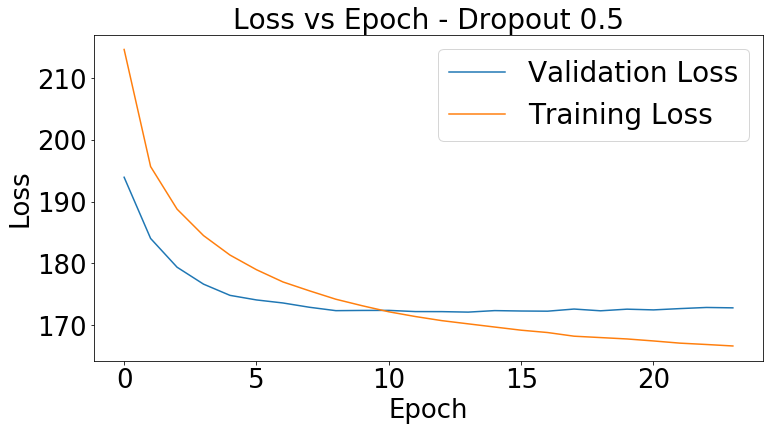

In [5]:
import matplotlib.pyplot as plt
import numpy as np
val_loss = np.load('TMP/val_loss_24.npy')
train_loss = np.load('TMP/train_loss_24.npy')
plt.figure(figsize=(12,6))
plt.plot(val_loss, label = 'Validation Loss')
plt.plot(train_loss, label = 'Training Loss')
plt.title('Loss vs Epoch - Dropout 0.5', fontsize = 28)
plt.xlabel('Epoch', fontsize = 26)
plt.ylabel('Loss', fontsize=26)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.legend(fontsize=28)
plt.show()

In [1]:
import utils
import params
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import model_from_json
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

C:\Users\bldr1\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
json_file = open('TMP/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

In [3]:
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("TMP/model_weights_dropout02.h5")
print("Loaded model from disk")

Loaded model from disk


In [4]:
tree = utils.importPickle(params.CNN_VAL_INDEX)
order = utils.importPickle(params.CNN_VAL_ORDER)
bigram_model = utils.importPickle(params.BIGRAM_MODEL)
tf_idf = utils.importPickle(params.TF_IDF_MODEL)

### QUERY

In [31]:
query = 'horses on the beach'
query_token = query.split(' ')
stemmer = SnowballStemmer("english")

In [32]:
query_ = ' '.join([stemmer.stem(word) for word in query_token])
print(query)
print(query_)

horses on the beach
hors on the beach


In [33]:
sparse = bigram_model.transform([query_])

In [34]:
descriptor = tf_idf.transform(sparse)

C:\Users\bldr1\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [35]:
descriptor2img = loaded_model.predict(descriptor)

In [36]:
descriptor2img.shape

(1, 128)

In [37]:
k = 10

In [38]:
dist, idxs = tree.query(descriptor2img, k = k)

In [39]:
dist

array([[0.18810144, 0.19806257, 0.21530714, 0.21639308, 0.21660183,
        0.22309912, 0.22743965, 0.2424906 , 0.24249715, 0.2444917 ]])

In [40]:
idxs

array([[15821, 27630, 40376,  2651, 31742,  4966, 38109, 36547, 22483,
        36758]], dtype=int64)

In [41]:
selected_images = [order[i] for i in idxs[0]]

In [42]:
selected_images

['C:\\Users\\bldr1\\Desktop\\TESIS\\DESCRIPTORS\\CNN_PCA\\VAL\\\\PCA_COCO_val2014_000000226571.npy',
 'C:\\Users\\bldr1\\Desktop\\TESIS\\DESCRIPTORS\\CNN_PCA\\VAL\\\\PCA_COCO_val2014_000000396754.npy',
 'C:\\Users\\bldr1\\Desktop\\TESIS\\DESCRIPTORS\\CNN_PCA\\VAL\\\\PCA_COCO_val2014_000000579759.npy',
 'C:\\Users\\bldr1\\Desktop\\TESIS\\DESCRIPTORS\\CNN_PCA\\VAL\\\\PCA_COCO_val2014_000000036765.npy',
 'C:\\Users\\bldr1\\Desktop\\TESIS\\DESCRIPTORS\\CNN_PCA\\VAL\\\\PCA_COCO_val2014_000000456015.npy',
 'C:\\Users\\bldr1\\Desktop\\TESIS\\DESCRIPTORS\\CNN_PCA\\VAL\\\\PCA_COCO_val2014_000000070636.npy',
 'C:\\Users\\bldr1\\Desktop\\TESIS\\DESCRIPTORS\\CNN_PCA\\VAL\\\\PCA_COCO_val2014_000000547886.npy',
 'C:\\Users\\bldr1\\Desktop\\TESIS\\DESCRIPTORS\\CNN_PCA\\VAL\\\\PCA_COCO_val2014_000000525665.npy',
 'C:\\Users\\bldr1\\Desktop\\TESIS\\DESCRIPTORS\\CNN_PCA\\VAL\\\\PCA_COCO_val2014_000000322361.npy',
 'C:\\Users\\bldr1\\Desktop\\TESIS\\DESCRIPTORS\\CNN_PCA\\VAL\\\\PCA_COCO_val2014_000000528

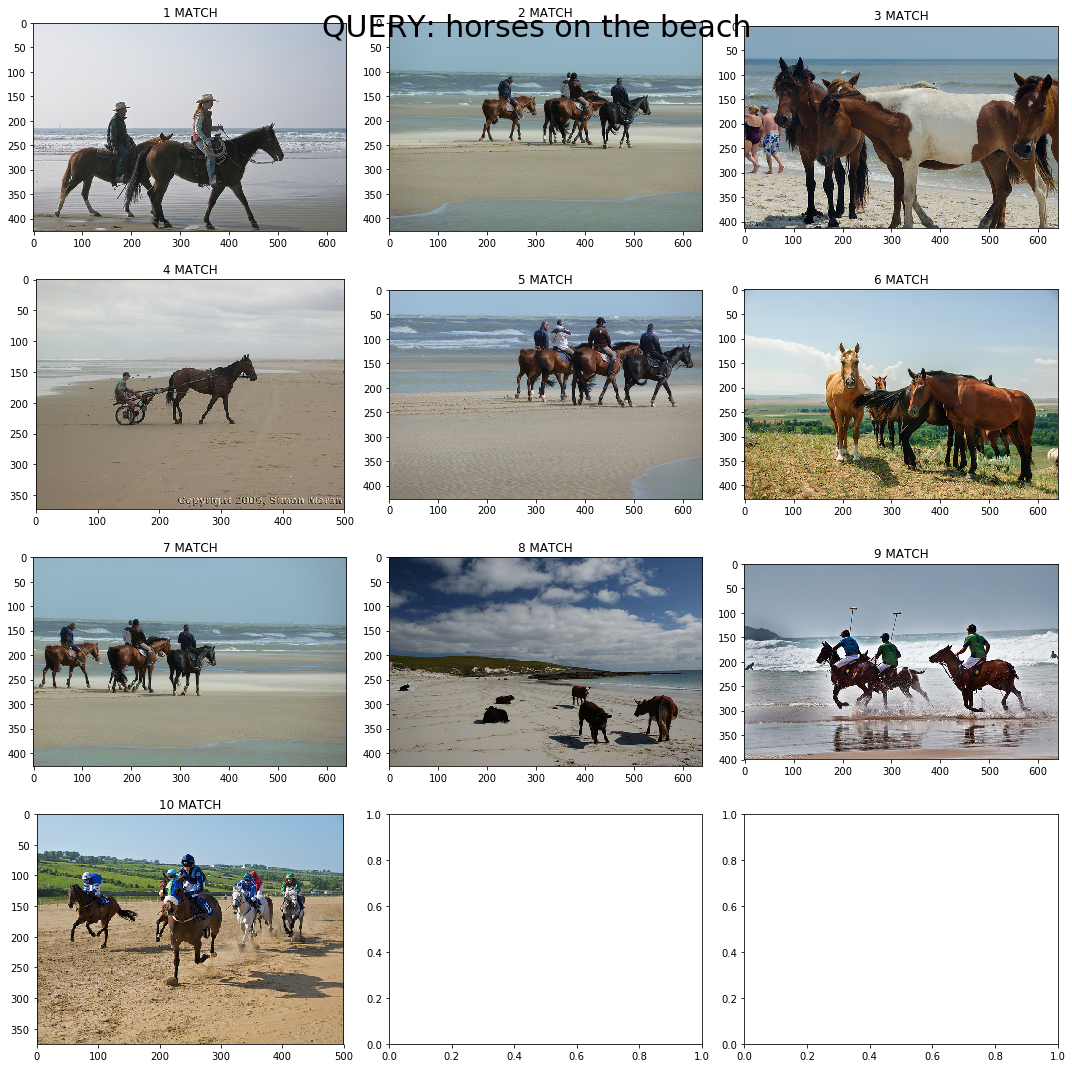

In [43]:
f, ax = plt.subplots(int(k/3) + 1, 3,figsize = (15,15))
f.suptitle('QUERY: {}'.format(query), fontsize=30)

row = 0
column = 0
for i, image in enumerate(selected_images):
    path = params.VAL_IMAGES_PATH + os.path.basename(image).split('.')[0][4:]+'.jpg'
    img = plt.imread(path)
    ax[row,column].imshow(img)
    ax[row,column].set_title(str(i+1)+ ' MATCH')
    if column == 2:
        row = row + 1
        column = 0
    else:
        column = column + 1

plt.tight_layout()
plt.show()